In [ ]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train = pd.read_csv('train_file.csv')
df_test = pd.read_csv('test_file.csv')

In [ ]:
df_train.head()

,patient_id,time,dos,age,airq,medication,headache,sex,hatype
0,1,-7.0,757.0,30.0,18.0,continuing,yes,female,0
1,2,-11.0,753.0,30.0,9.0,continuing,yes,female,0
2,3,-6.0,758.0,30.0,19.0,continuing,yes,female,0
3,4,29.0,793.0,30.0,21.0,continuing,yes,female,0
4,5,22.0,786.0,30.0,21.0,continuing,yes,female,0


In [ ]:
df_test.head()

,patient_id,time,dos,age,airq,medication,headache,sex
0,1,23.0,262,54,20.0,continuing,yes,female
1,2,31.0,795,30,15.0,continuing,yes,female
2,3,28.0,792,30,22.0,continuing,no,female
3,4,26.0,790,30,12.0,continuing,yes,female
4,5,34.0,798,30,20.0,continuing,yes,female


In [ ]:
df_train['hatype'].value_counts()

1    1704
0    1202
Name: hatype, dtype: int64

In [ ]:
# Balance dataset found
df_train.isnull().sum()

patient_id     0
time           7
dos            5
age            8
airq           1
medication    16
headache       1
sex            0
hatype         0
dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  2906 non-null   int64  
 1   time        2899 non-null   float64
 2   dos         2901 non-null   float64
 3   age         2898 non-null   float64
 4   airq        2905 non-null   float64
 5   medication  2890 non-null   object 
 6   headache    2905 non-null   object 
 7   sex         2906 non-null   object 
 8   hatype      2906 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 204.5+ KB


In [ ]:
df_test.isnull().sum()

patient_id     0
time           2
dos            0
age            0
airq           0
medication    10
headache       1
sex            0
dtype: int64

In [ ]:
# missing data found - we have to handle

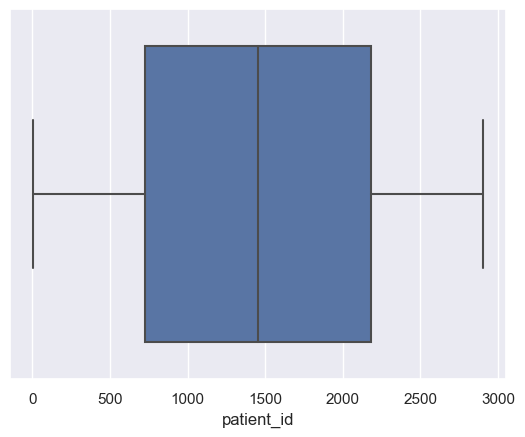

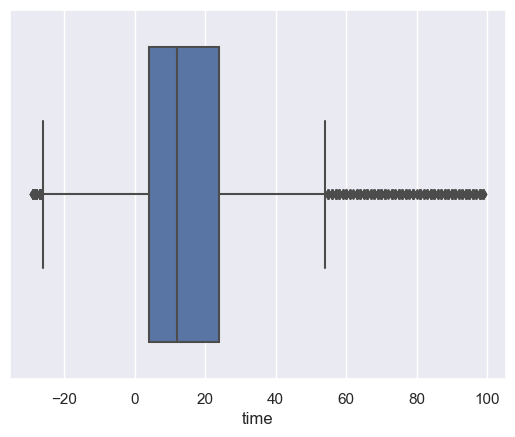

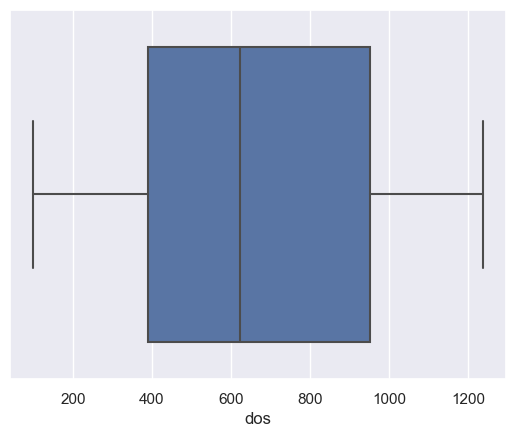

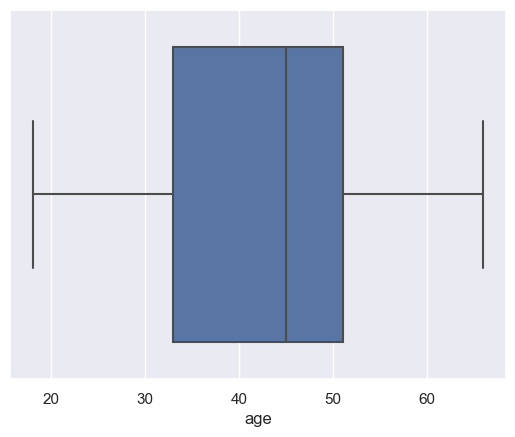

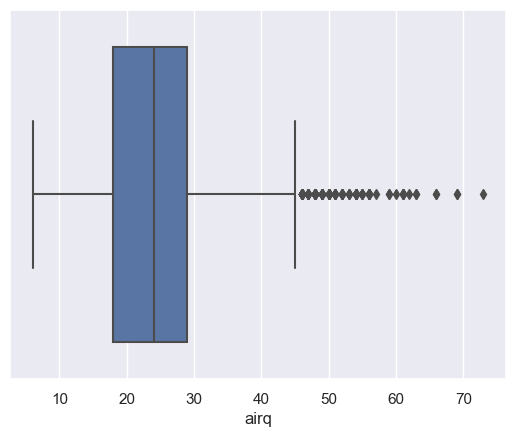

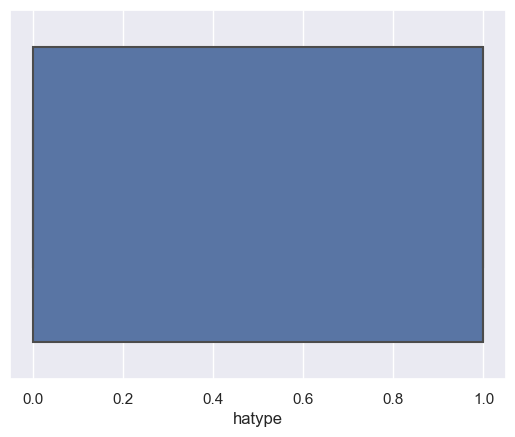

In [ ]:
def boxplot(col):
    sns.boxplot(df_train[col])
    plt.show()
    
for i in list(df_train.select_dtypes(exclude=['object']).columns):
    boxplot(i)

In [ ]:
df_train.columns

Index(['patient_id', 'time', 'dos', 'age', 'airq', 'medication', 'headache',
       'sex', 'hatype'],
      dtype='object')

<AxesSubplot:ylabel='airq'>

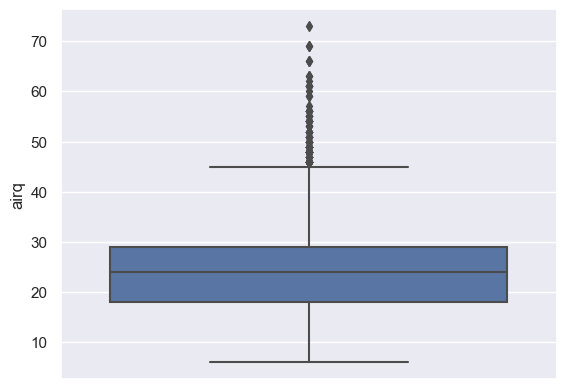

In [ ]:
sns.boxplot(y='airq', data=df_train)

In [ ]:
# missing data found - we have to handle it
# outlier - there is no problem, we can go ahead without handling outlier part
# imbalance dataset - it's balance dataset so no need to handle it
# Encoding part - it is requried so we have to handle it
# feature scaling - 

In [ ]:
df_train.head()

,patient_id,time,dos,age,airq,medication,headache,sex,hatype
0,1,-7.0,757.0,30.0,18.0,continuing,yes,female,0
1,2,-11.0,753.0,30.0,9.0,continuing,yes,female,0
2,3,-6.0,758.0,30.0,19.0,continuing,yes,female,0
3,4,29.0,793.0,30.0,21.0,continuing,yes,female,0
4,5,22.0,786.0,30.0,21.0,continuing,yes,female,0


In [ ]:
df_test.head(2)

,patient_id,time,dos,age,airq,medication,headache,sex
0,1,23.0,262,54,20.0,continuing,yes,female
1,2,31.0,795,30,15.0,continuing,yes,female


In [ ]:
# Dropping unnecessary columns from the both train and test dataset

In [ ]:
df_train.drop(['patient_id'], axis=1, inplace=True)
df_test.drop(['patient_id'], axis=1, inplace=True)

In [ ]:
print(df_train.isnull().sum()/len(df_train)*100)
print("***************"*5)
print(df_test.isnull().sum()/len(df_test)*100)

time          0.240881
dos           0.172058
age           0.275292
airq          0.034412
medication    0.550585
headache      0.034412
sex           0.000000
hatype        0.000000
dtype: float64
***************************************************************************
time          0.200401
dos           0.000000
age           0.000000
airq          0.000000
medication    1.002004
headache      0.100200
sex           0.000000
dtype: float64


# Imputation categorical values - using Mode

In [ ]:
df_train.loc[df_train['medication'].isnull() == True, 'medication'] = df_train['medication'].mode()[0]
df_test.loc[df_test['medication'].isnull() == True, 'medication'] = df_test['medication'].mode()[0]

df_train.loc[df_train['headache'].isnull() == True, 'headache'] = df_train['headache'].mode()[0]
df_test.loc[df_test['headache'].isnull() == True, 'headache'] = df_test['headache'].mode()[0]

df_train.loc[df_train['sex'].isnull() == True, 'sex'] = df_train['sex'].mode()[0]
df_test.loc[df_test['sex'].isnull() == True, 'sex'] = df_test['sex'].mode()[0]

In [ ]:
print(df_train.isnull().sum()/len(df_train)*100)
print("***************"*5)
print(df_test.isnull().sum()/len(df_test)*100)

time          0.240881
dos           0.172058
age           0.275292
airq          0.034412
medication    0.000000
headache      0.000000
sex           0.000000
hatype        0.000000
dtype: float64
***************************************************************************
time          0.200401
dos           0.000000
age           0.000000
airq          0.000000
medication    0.000000
headache      0.000000
sex           0.000000
dtype: float64


In [ ]:
df_train.head(2)

,time,dos,age,airq,medication,headache,sex,hatype
0,-7.0,757.0,30.0,18.0,continuing,yes,female,0
1,-11.0,753.0,30.0,9.0,continuing,yes,female,0


In [ ]:
df_test.head(2)

,time,dos,age,airq,medication,headache,sex
0,23.0,262,54,20.0,continuing,yes,female
1,31.0,795,30,15.0,continuing,yes,female


In [ ]:
df_train['medication'].value_counts()

continuing    1690
reduced        681
none           535
Name: medication, dtype: int64

# Encoding categorical values
### pd.get_dummies means one_hot_encoding and drop_first is dummy variable(n-1)

In [ ]:
df_train = pd.get_dummies(df_train, drop_first=True)
df_train

,time,dos,age,airq,hatype,medication_none,medication_reduced,headache_yes,sex_male
0,-7.0,757.0,30.0,18.0,0,0,0,1,0
1,-11.0,753.0,30.0,9.0,0,0,0,1,0
2,-6.0,758.0,30.0,19.0,0,0,0,1,0
3,29.0,793.0,30.0,21.0,0,0,0,1,0
4,22.0,786.0,30.0,21.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
2901,27.0,1215.0,26.0,20.0,0,0,0,1,1
2902,37.0,1225.0,26.0,22.0,0,0,0,1,1
2903,24.0,1212.0,26.0,27.0,0,0,0,1,1
2904,46.0,1234.0,26.0,28.0,0,0,0,0,1


In [ ]:
df_test = pd.get_dummies(df_test, drop_first=True)
df_test

,time,dos,age,airq,medication_reduced,headache_yes,sex_male
0,23.0,262,54,20.0,0,1,0
1,31.0,795,30,15.0,0,1,0
2,28.0,792,30,22.0,0,0,0
3,26.0,790,30,12.0,0,1,0
4,34.0,798,30,20.0,0,1,0
...,...,...,...,...,...,...,...
993,35.0,1223,26,24.0,0,1,1
994,43.0,1231,26,19.0,0,1,1
995,42.0,1230,26,20.0,0,0,1
996,29.0,1217,26,25.0,0,1,1


In [ ]:
df_train.isnull().sum()

time                  7
dos                   5
age                   8
airq                  1
hatype                0
medication_none       0
medication_reduced    0
headache_yes          0
sex_male              0
dtype: int64

In [ ]:
df_test.isnull().sum()

time                  2
dos                   0
age                   0
airq                  0
medication_reduced    0
headache_yes          0
sex_male              0
dtype: int64

# Imputing continuous values by using sklearn and median method

In [ ]:
cols = df_train.columns
cols

Index(['time', 'dos', 'age', 'airq', 'hatype', 'medication_none',
       'medication_reduced', 'headache_yes', 'sex_male'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer
SI = SimpleImputer(strategy='median')
df_train = SI.fit_transform(df_train)
df_train = pd.DataFrame(df_train, columns=cols)

df_test.loc[df_test['time'].isnull()==True, 'time'] = df_test['time'].median()

In [ ]:
df_train.isnull().sum()

time                  0
dos                   0
age                   0
airq                  0
hatype                0
medication_none       0
medication_reduced    0
headache_yes          0
sex_male              0
dtype: int64

In [ ]:
df_test.isnull().sum()

time                  0
dos                   0
age                   0
airq                  0
medication_reduced    0
headache_yes          0
sex_male              0
dtype: int64

In [ ]:
df_train.describe()

,time,dos,age,airq,hatype,medication_none,medication_reduced,headache_yes,sex_male
count,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000
mean,15.433930,646.400551,42.532003,24.941844,0.586373,0.184102,0.234343,0.641432,0.146249
std,21.719078,333.837915,11.148775,9.531121,0.492568,0.387634,0.423660,0.479663,0.353417
min,-29.000000,98.000000,18.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,389.250000,33.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,622.000000,45.000000,24.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,24.000000,950.000000,51.000000,29.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,99.000000,1238.000000,66.000000,73.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# splitting the independent and dependent variable 
x = df_train.drop(['hatype'], axis=1)
y = df_train['hatype']

In [ ]:
x.head()

,time,dos,age,airq,medication_none,medication_reduced,headache_yes,sex_male
0,-7.0,757.0,30.0,18.0,0.0,0.0,1.0,0.0
1,-11.0,753.0,30.0,9.0,0.0,0.0,1.0,0.0
2,-6.0,758.0,30.0,19.0,0.0,0.0,1.0,0.0
3,29.0,793.0,30.0,21.0,0.0,0.0,1.0,0.0
4,22.0,786.0,30.0,21.0,0.0,0.0,1.0,0.0


In [ ]:
# missing data found - completed
# outlier - not required as i am doing feature scaling
# imbalance dataset - it's balance dataset so no need to handle it
# Encoding part - completed
# feature scaling - 

In [ ]:
cols = x.columns

In [ ]:
cols

Index(['time', 'dos', 'age', 'airq', 'medication_none', 'medication_reduced',
       'headache_yes', 'sex_male'],
      dtype='object')

In [ ]:
col_test = df_test.columns
col_test

Index(['time', 'dos', 'age', 'airq', 'medication_reduced', 'headache_yes',
       'sex_male'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler = pd.DataFrame(x_scaler, columns=cols)

x_scaler_test = scaler.fit_transform(df_test)
x_scaler_test = pd.DataFrame(x_scaler_test, columns=col_test)

In [ ]:
x_scaler

,time,dos,age,airq,medication_none,medication_reduced,headache_yes,sex_male
0,-1.033091,0.331354,-1.124263,-0.728460,-0.475019,-0.553234,0.747672,-0.413886
1,-1.217293,0.319370,-1.124263,-1.672898,-0.475019,-0.553234,0.747672,-0.413886
2,-0.987041,0.334350,-1.124263,-0.623522,-0.475019,-0.553234,0.747672,-0.413886
3,0.624723,0.439209,-1.124263,-0.413647,-0.475019,-0.553234,0.747672,-0.413886
4,0.302370,0.418237,-1.124263,-0.413647,-0.475019,-0.553234,0.747672,-0.413886
...,...,...,...,...,...,...,...,...
2901,0.532622,1.703513,-1.483109,-0.518585,-0.475019,-0.553234,0.747672,2.416122
2902,0.993126,1.733473,-1.483109,-0.308710,-0.475019,-0.553234,0.747672,2.416122
2903,0.394471,1.694525,-1.483109,0.215978,-0.475019,-0.553234,0.747672,2.416122
2904,1.407580,1.760437,-1.483109,0.320915,-0.475019,-0.553234,-1.337486,2.416122


In [ ]:
x_scaler_test

,time,dos,age,airq,medication_reduced,headache_yes,sex_male
0,0.390860,-1.111316,1.081290,-0.465092,-0.650907,0.679118,-0.380126
1,0.767475,0.447804,-1.057184,-1.021695,-0.650907,0.679118,-0.380126
2,0.626245,0.439029,-1.057184,-0.242451,-0.650907,-1.472499,-0.380126
3,0.532091,0.433179,-1.057184,-1.355657,-0.650907,0.679118,-0.380126
4,0.908706,0.456580,-1.057184,-0.465092,-0.650907,0.679118,-0.380126
...,...,...,...,...,...,...,...
993,0.955782,1.699781,-1.413597,-0.019810,-0.650907,0.679118,2.630710
994,1.332397,1.723182,-1.413597,-0.576413,-0.650907,0.679118,2.630710
995,1.285320,1.720257,-1.413597,-0.465092,-0.650907,-1.472499,2.630710
996,0.673321,1.682230,-1.413597,0.091510,-0.650907,0.679118,2.630710


In [ ]:
# Preprocessing part completed
# Pandas profiling

<AxesSubplot:>

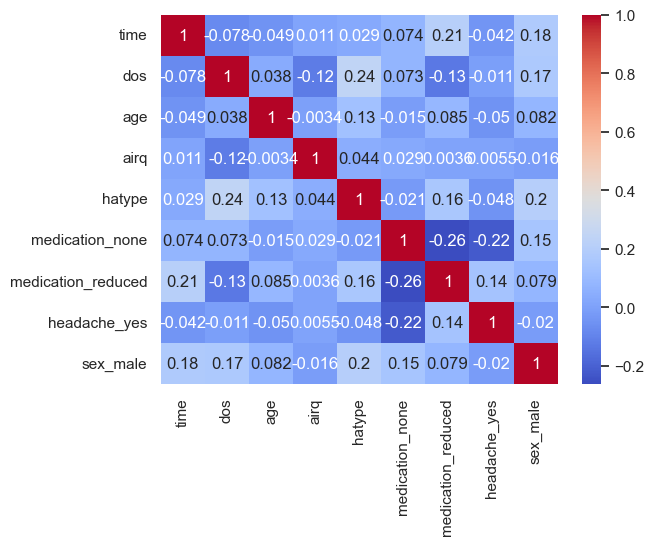

In [ ]:
sns.heatmap(df_train.corr(), cmap='coolwarm', annot=True)

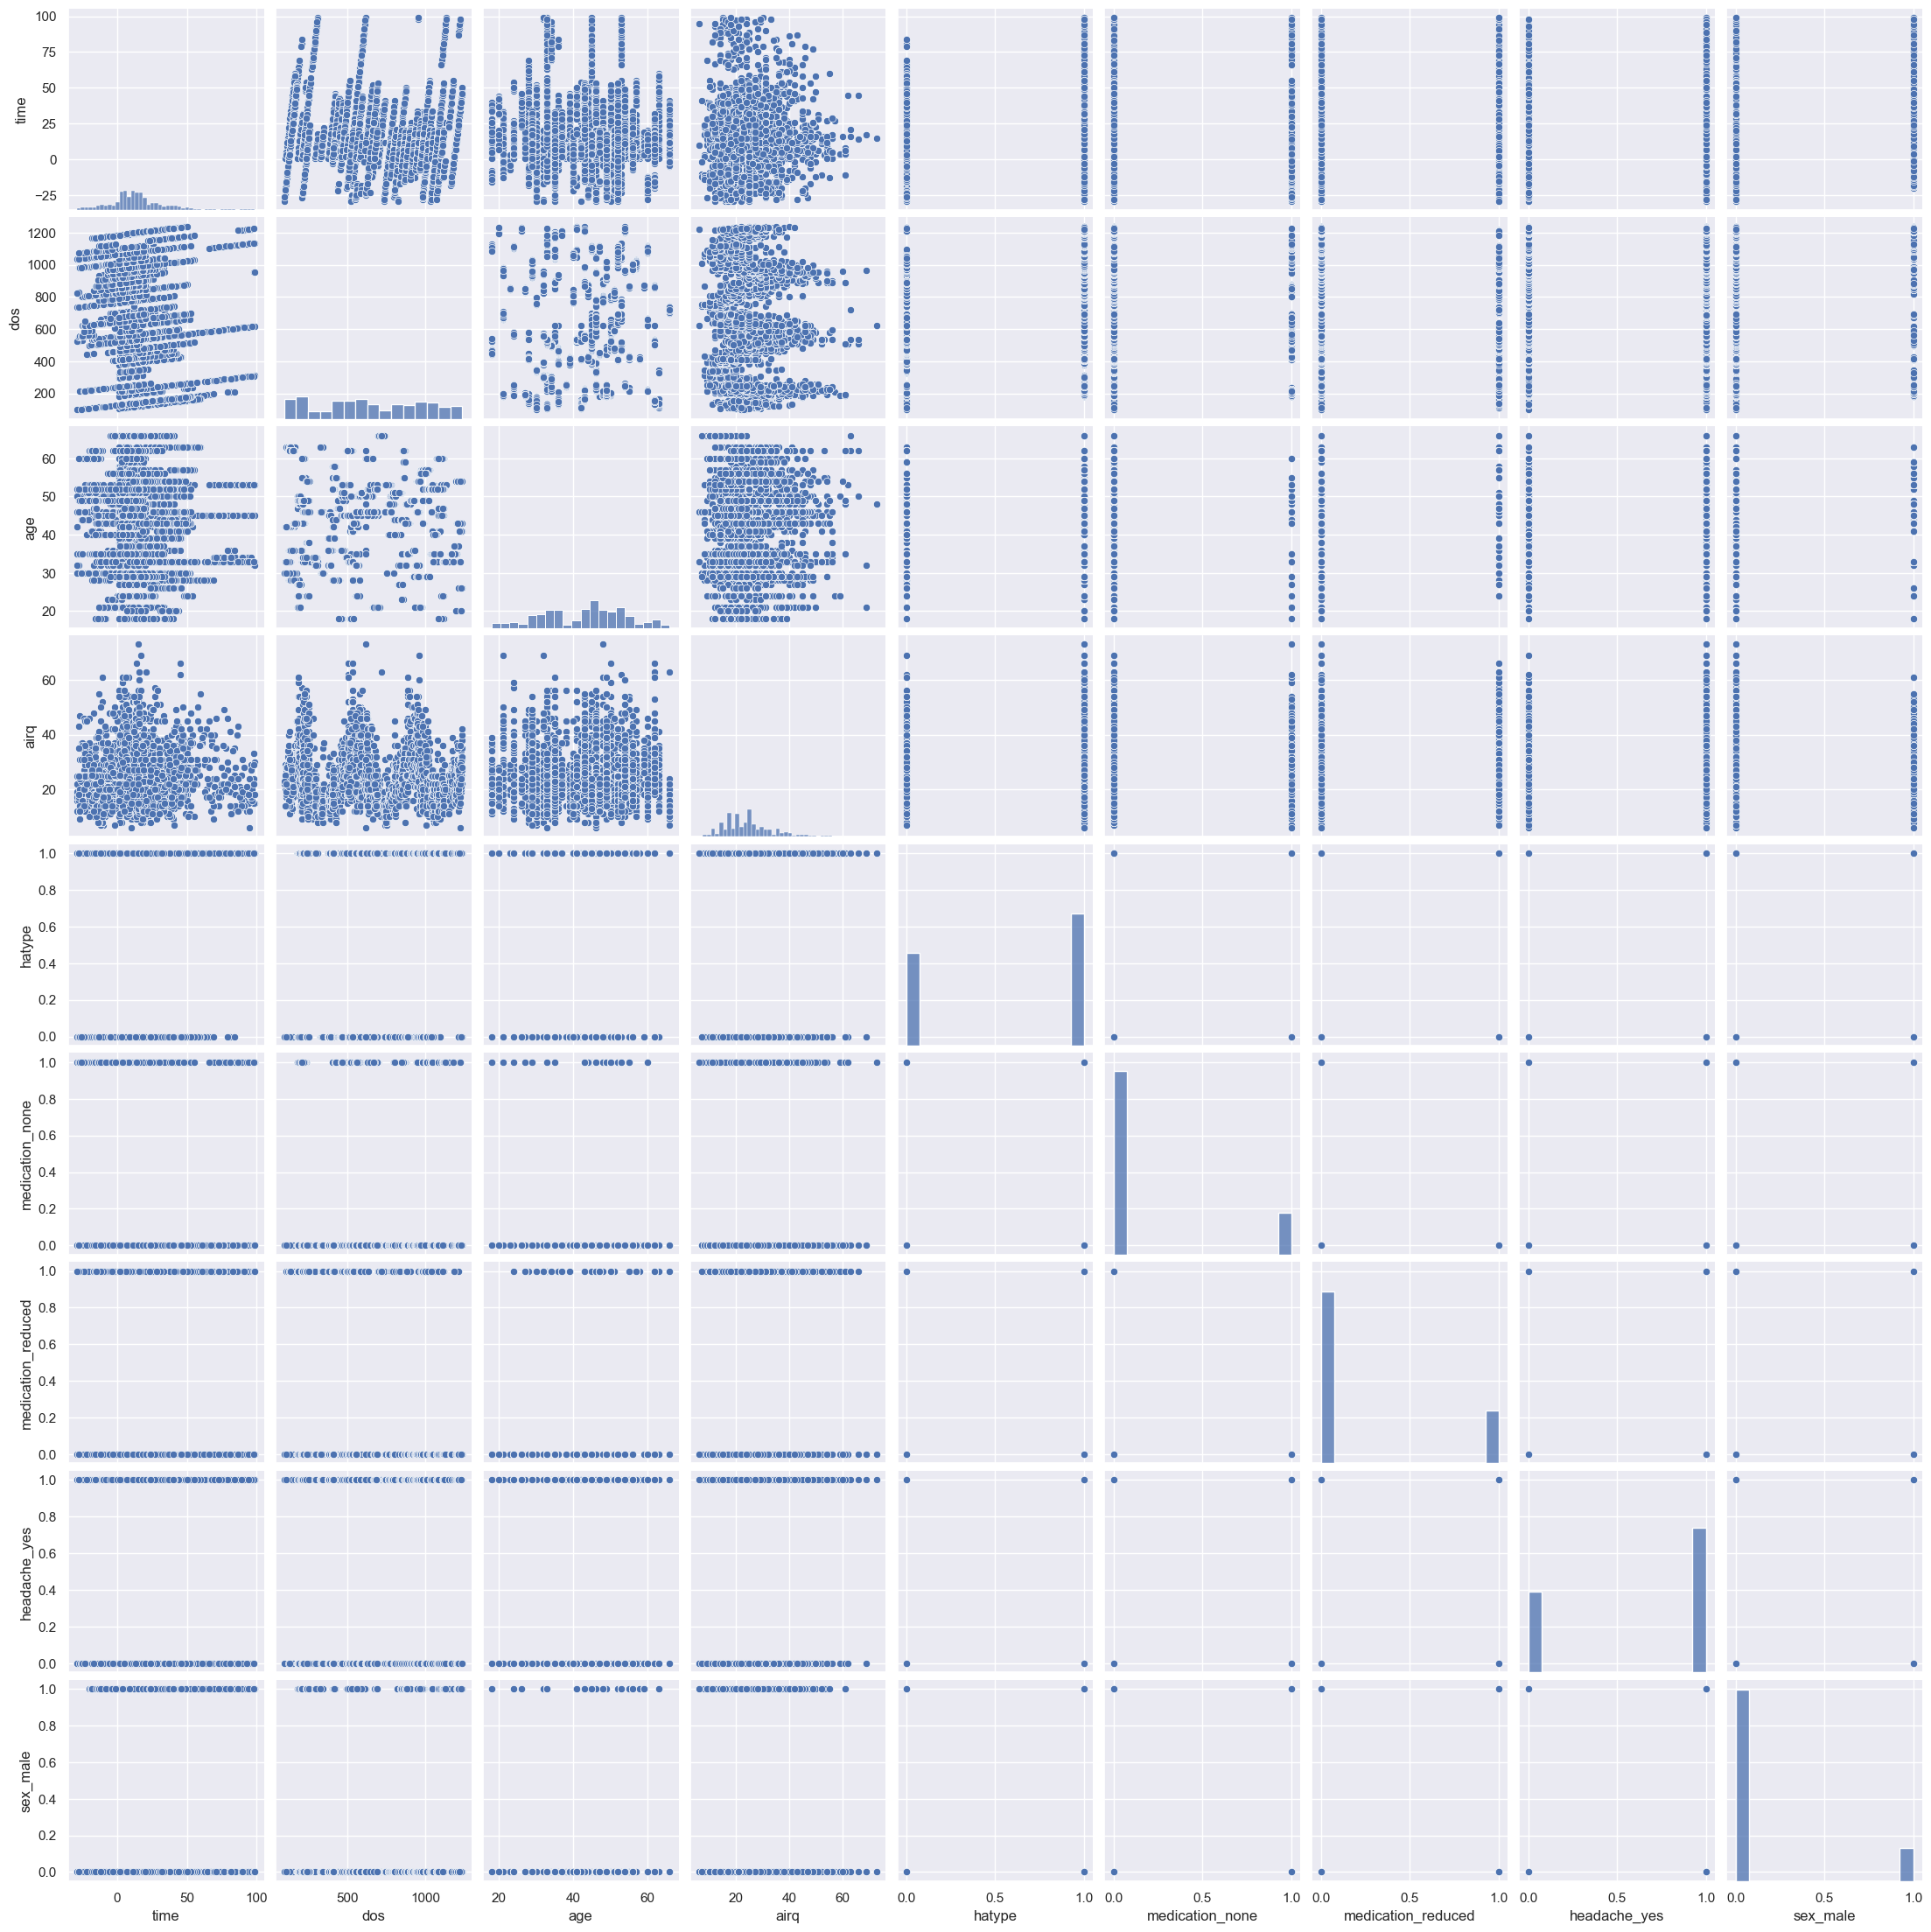

In [ ]:
sns.pairplot(df_train)

# Splitting training dataset into train and validation set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.2, random_state=101)

# Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print(confusion_matrix(y_test, y_pred_test))

[[109 146]
 [ 81 246]]


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.57      0.43      0.49       255
         1.0       0.63      0.75      0.68       327

    accuracy                           0.61       582
   macro avg       0.60      0.59      0.59       582
weighted avg       0.60      0.61      0.60       582



In [ ]:
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print("*************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

Train Accuracy 0.6161790017211703
*****************************************************************
Test Accuracy 0.6099656357388317


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt_train = dt.predict(x_train)
y_pred_dt_test = dt.predict(x_test)

In [ ]:
print("Train Accuracy", accuracy_score(y_train, y_pred_dt_train))
print("*************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_dt_test))

Train Accuracy 1.0
*****************************************************************
Test Accuracy 0.9759450171821306


In [ ]:
print("Train Accuracy", classification_report(y_train, y_pred_dt_train))
print("*************"*5)
print("Test Accuracy", classification_report(y_test, y_pred_dt_test))

Train Accuracy               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       947
         1.0       1.00      1.00      1.00      1377

    accuracy                           1.00      2324
   macro avg       1.00      1.00      1.00      2324
weighted avg       1.00      1.00      1.00      2324

*****************************************************************
Test Accuracy               precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       255
         1.0       0.98      0.98      0.98       327

    accuracy                           0.98       582
   macro avg       0.98      0.98      0.98       582
weighted avg       0.98      0.98      0.98       582



# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [ ]:
print("Train Accuracy", accuracy_score(y_train, y_pred_rf_train))
print("*************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_rf_test))

Train Accuracy 1.0
*****************************************************************
Test Accuracy 0.9810996563573883


In [ ]:
print("Train Accuracy", classification_report(y_train, y_pred_rf_train))
print("*************"*5)
print("Test Accuracy", classification_report(y_test, y_pred_rf_test))

Train Accuracy               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       947
         1.0       1.00      1.00      1.00      1377

    accuracy                           1.00      2324
   macro avg       1.00      1.00      1.00      2324
weighted avg       1.00      1.00      1.00      2324

*****************************************************************
Test Accuracy               precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       255
         1.0       0.98      0.99      0.98       327

    accuracy                           0.98       582
   macro avg       0.98      0.98      0.98       582
weighted avg       0.98      0.98      0.98       582



In [ ]:
RandomForestClassifier()

# HyperParameter Tunning 

In [ ]:
param = {'max_depth': [1,2,3,6,9 ], 'n_estimators':[50, 70, 100, 150,50], 
          'max_features': [1,2,3,4,5], 'criterion' : ['gini', 'entropy'],'bootstrap':[True, False],
         'min_samples_leaf': [1,1,2,4,3]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rnd_search = RandomizedSearchCV(RandomForestClassifier(), param, n_iter =10, cv=9)

In [ ]:
rnd_search.fit(x_train, y_train)

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 6, 9],
                                        'max_features': [1, 2, 3, 4, 5],
                                        'min_samples_leaf': [1, 1, 2, 4, 3],
                                        'n_estimators': [50, 70, 100, 150, 50]})

In [ ]:
rnd_search.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 1,
 'max_features': 4,
 'max_depth': 9,
 'criterion': 'gini',
 'bootstrap': False}

In [ ]:
final_model = RandomForestClassifier(n_estimators=100,min_samples_leaf=1, max_features=4,max_depth=9,
                                     criterion='gini',bootstrap=True)
                                     
final_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, max_features=4)

In [ ]:
y_pred_train = final_model.predict(x_train)
y_pred_test = final_model.predict(x_test)

In [ ]:
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print("*************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

Train Accuracy 0.979776247848537
*****************************************************************
Test Accuracy 0.9604810996563574


In [ ]:
rnd_search.best_score_

0.9556766068393975

In [ ]:
from sklearn.model_selection import GridSearchCV 

In [ ]:
grd_search = GridSearchCV(RandomForestClassifier(), param, cv=9)

# Xgboost, adaboost, bagging, gradientboosting, stacking, knn, svm, naivebayest, pycaret

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier([('LogisticReg' , lr),('DecisionTree', dt),('RF', rf)],voting='hard', weights=[1,1,1])
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('LogisticReg', LogisticRegression()),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('RF', RandomForestClassifier())],
                 weights=[1, 1, 1])

In [ ]:
y_pred_v_train = voting.predict(x_train)
y_pred_v_test = voting.predict(x_test)

In [ ]:
print("Train Accuracy", accuracy_score(y_train, y_pred_v_train))
print("*************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_v_test))

Train Accuracy 1.0
*****************************************************************
Test Accuracy 0.9707903780068728


In [ ]:
#https://towardsdatascience.com/machine-learning-gridsearchcv-randomizedsearchcv-d36b89231b10

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVC()